In [1]:
import cirq
import numpy as np
from math import pi
#from cirq.ops import gate_operation
from cirq.value import Duration

#libraries to plot histogram
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

#google
from cirq import circuits, ops, sim, study, protocols, optimizers
from cirq.google import convert_to_xmon_gates
from cirq import circuits, ops, sim, study, protocols
from cirq.google import xmon_device

In [2]:
# define the length of the grid.
length = 5

#number of qubits used
N = 18

# define qubits on the grid.
#qubits = [cirq.GridQubit(i, j) for i in range(length) for j in range(length-1)]

qubits = cirq.LineQubit.range(N)

#print(qubits)

In [10]:
def circuitXmon(j):  
    
    device = cirq.google.XmonDevice(measurement_duration = cirq.Duration(nanos=1000),
                                    exp_w_duration = cirq.Duration(nanos=20),
                                    exp_11_duration = cirq.Duration(nanos=50),
                                    qubits = qubits)
    
    circuit = cirq.Circuit(device = device ) #device

#    implement circuit 

    #cirq.google.optimized_for_xmon(circuit = circuit, new_device = device, allow_partial_czs = True) 
    
    circuit.append(cirq.google.ConvertToXmonGates.convert ( op = cirq.H(qubits[5]) ) )
#    circuit.append(cirq.CNOT(qubits[5],qubits[10])) 
    

                   
    cnot56_0 = cirq.CNOT(qubits[5],qubits[6])
    cnot1011_0 = cirq.CNOT(qubits[10],qubits[11])
    moment_0 = cirq.Moment([cnot56_0,cnot1011_0])

    cnot50_1 = cirq.CNOT(qubits[5],qubits[0])
    cnot67_1 = cirq.CNOT(qubits[6],qubits[7])
    cnot1112_1 = cirq.CNOT(qubits[11],qubits[12])
    moment_1 = cirq.Moment([cnot50_1,cnot67_1,cnot1112_1])

    cnot01_2 = cirq.CNOT(qubits[0],qubits[1])
    cnot78_2 = cirq.CNOT(qubits[7],qubits[8])
    cnot1015_2 = cirq.CNOT(qubits[10],qubits[15])
    moment_2 = cirq.Moment([cnot01_2,cnot78_2,cnot1015_2])

    cnot12_3 = cirq.CNOT(qubits[1],qubits[2])
    cnot89_3 = cirq.CNOT(qubits[8],qubits[9])
    cnot1213_3 = cirq.CNOT(qubits[12],qubits[13])
    cnot1516_3 = cirq.CNOT(qubits[15],qubits[16])
    moment_3 = cirq.Moment([cnot12_3,cnot89_3,cnot1213_3,cnot1516_3])

    cnot23_4 = cirq.CNOT(qubits[2],qubits[3])
    cnot94_4 = cirq.CNOT(qubits[9],qubits[4])
    cnot1314_4 = cirq.CNOT(qubits[13],qubits[14])
    cnot1617_4 = cirq.CNOT(qubits[16],qubits[17])
    moment_4 = cirq.Moment([cnot23_4,cnot94_4,cnot1314_4,cnot1617_4])

    #insert x gate on all qubits
    moment_5 = cirq.Moment(cirq.X(qubits[q]) for q in range(N))

    #insert U gate on all qubits
    phi = (pi*j)/(N+1)
        #A  unitary 1-qubit gate U 
    matrix=np.array([[np.exp(-1.0j*phi/2), 0], [0, np.exp(1.0j*phi/2)]])
    #matrix=np.array([[1, 0], [0, np.exp(1.0j*phi/2)]]) #DUBBIO SULLA MATRICE DI ROTAZIONE!!!!!!
    moment_6 = cirq.Moment( cirq.SingleQubitMatrixGate(matrix).on(qubits[q]) for q in range(N) )

    moment_7 = moment_4

    moment_8 = moment_3

    moment_9 = moment_2

    moment_10 = moment_1

    moment_11 = moment_0

    circuit.append([moment_0,moment_1,moment_2,moment_3,moment_4,moment_5,moment_6,moment_7,moment_8,moment_9,moment_10,moment_11])

    circuit.append(cirq.CNOT(qubits[5],qubits[10]))
    circuit.append(cirq.H(qubits[5]))
        
    #measurement
    moment_M = cirq.Moment( [cirq.measure(qubits[q],key='{}'.format(q)) for q in range(N)] )
    circuit.append(moment_M)
    
    #print(circuit)
        
    return circuit

In [3]:
def circuit(j,string):  
       
    circuit = cirq.Circuit()

    if( string == 'Noise'): 
        
    #    implement noise
        #    for q in range(N):
        circuit.append ( cirq.PhaseDampingChannel(0.2).on(qubits[5]) )
                #cirq.PhaseDampingChannel(0.2).on(qubits[q]) 
                # cirq.DepolarizingChannel(0.2).on(qubits[q])
                #cirq.PhaseFlipChannel(0.3).on(qubits[q])
                #cirq.BitFlipChannel(0.3).on(qubits[q])
    
#   implement circuit 

    circuit.append(cirq.H(qubits[5]))
    circuit.append(cirq.CNOT(qubits[5],qubits[10]))

    cnot56_0 = cirq.CNOT(qubits[5],qubits[6])
    cnot1011_0 = cirq.CNOT(qubits[10],qubits[11])
    moment_0 = cirq.Moment([cnot56_0,cnot1011_0])

    cnot50_1 = cirq.CNOT(qubits[5],qubits[0])
    cnot67_1 = cirq.CNOT(qubits[6],qubits[7])
    cnot1112_1 = cirq.CNOT(qubits[11],qubits[12])
    moment_1 = cirq.Moment([cnot50_1,cnot67_1,cnot1112_1])

    cnot01_2 = cirq.CNOT(qubits[0],qubits[1])
    cnot78_2 = cirq.CNOT(qubits[7],qubits[8])
    cnot1015_2 = cirq.CNOT(qubits[10],qubits[15])
    moment_2 = cirq.Moment([cnot01_2,cnot78_2,cnot1015_2])

    cnot12_3 = cirq.CNOT(qubits[1],qubits[2])
    cnot89_3 = cirq.CNOT(qubits[8],qubits[9])
    cnot1213_3 = cirq.CNOT(qubits[12],qubits[13])
    cnot1516_3 = cirq.CNOT(qubits[15],qubits[16])
    moment_3 = cirq.Moment([cnot12_3,cnot89_3,cnot1213_3,cnot1516_3])

    cnot23_4 = cirq.CNOT(qubits[2],qubits[3])
    cnot94_4 = cirq.CNOT(qubits[9],qubits[4])
    cnot1314_4 = cirq.CNOT(qubits[13],qubits[14])
    cnot1617_4 = cirq.CNOT(qubits[16],qubits[17])
    moment_4 = cirq.Moment([cnot23_4,cnot94_4,cnot1314_4,cnot1617_4])

    #insert x gate on all qubits
    moment_5 = cirq.Moment(cirq.X(qubits[q]) for q in range(N))

    #insert U gate on all qubits
    phi = (pi*j)/(N+1)
        #A  unitary 1-qubit gate U 
    matrix=np.array([[np.exp(-1.0j*phi/2), 0], [0, np.exp(1.0j*phi/2)]])
    #matrix=np.array([[1, 0], [0, np.exp(1.0j*phi/2)]]) #DUBBIO SULLA MATRICE DI ROTAZIONE!!!!!!
    moment_6 = cirq.Moment( cirq.SingleQubitMatrixGate(matrix).on(qubits[q]) for q in range(N) )

    moment_7 = moment_4

    moment_8 = moment_3

    moment_9 = moment_2

    moment_10 = moment_1

    moment_11 = moment_0

    circuit.append([moment_0,moment_1,moment_2,moment_3,moment_4,moment_5,moment_6,moment_7,moment_8,moment_9,moment_10,moment_11])

    circuit.append(cirq.CNOT(qubits[5],qubits[10]))
    circuit.append(cirq.H(qubits[5]))
     
    if(string == 'NoNoise'):
        #measurement
        moment_M = cirq.Moment( [cirq.measure(qubits[q],key='{}'.format(q)) for q in range(N)] )
        circuit.append(moment_M)
    
    if(string == 'Noise'):
        #measurement
        circuit.append(cirq.measure(qubits[5],key='5'))
        
    #print(circuit)
        
    return circuit

In [13]:
def simulation(circuit,string):

    if(string == 'NoNoise'):
    
        simulator = cirq.Simulator()
        results = simulator.run(circuit, repetitions=100)
    
        for i in range (N):
        
            h = results.histogram(key='{}'.format(i)) 
        
            if (i==5):
            
                #print counter
                print( h )
            
                #plot histogram
                labels, values = zip(*h.items())

                indexes = np.arange(len(labels))
                width = 1

                plt.bar(indexes, values, width)
                plt.xticks(indexes + width * 0.5, labels)
                plt.show()

    if(string == 'Noise'):

        #simulator = cirq.Simulator()
        #results = simulator.run(circuit, repetitions=100)
        #dens = cirq.DensityMatrixSimulator()
        #results = dens.run(circuit, repetitions = 100)
        results = cirq.sample(circuit, repetitions=100) 
        #results = dens.simulate(circuit)
        
        h = results.histogram(key='5') 
        print(h)

In [5]:
def simulationXmon(circuit):
    simulator = cirq.google.XmonSimulator()
    results = simulator.run(circuit, repetitions=100)
    for i in range (N):
        print(results.histogram(key='{}'.format(i)) ) 

In [8]:
def main ():    
   # for j in range(2*N+1):
    for j in range(2):
        print('Histogram j = {}'.format(j))
        #simulation(circuit(j, 'Noise'), 'Noise') 
        simulation(circuit(j, 'NoNoise'), 'NoNoise')
        #simulationXmon(circuitXmon(j)) 

Histogram j = 0
Counter({0: 100})


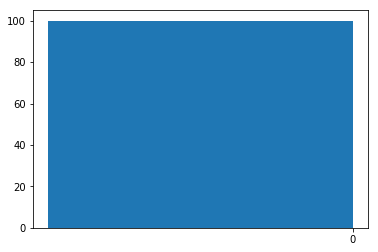

Histogram j = 1
Counter({1: 100})


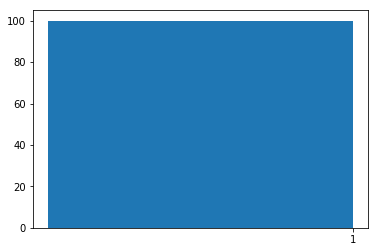

In [12]:
if __name__ == '__main__':
    main()

In [ ]:
#noise = cirq.ConstantQubitNoiseModel(cirq.depolarize(0.2))

Histogram j = 0
                                       ┌             ┐
0: ────────────────X───@───────────X───│1.+0.j 0.+0.j│───────────@───X───────────────M───
                   │   │               │0.+0.j 1.+0.j│           │   │
                   │   │               └             ┘           │   │
                   │   │                                         │   │
                   │   │               ┌             ┐           │   │
1: ────────────────┼───X───@───────X───│1.+0.j 0.+0.j│───────@───X───┼───────────────M───
                   │       │           │0.+0.j 1.+0.j│       │       │
                   │       │           └             ┘       │       │
                   │       │                                 │       │
                   │       │           ┌             ┐       │       │
2: ────────────────┼───────X───@───X───│1.+0.j 0.+0.j│───@───X───────┼───────────────M───
                   │           │       │0.+0.j 1.+0.j│   │           │
                   │

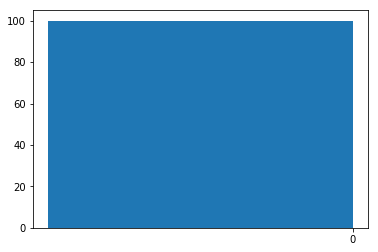

In [13]:
#if __name__ == '__main__':
#    main()